# X-13ARIMA-SEATS

In [ ]:
#install.packages("seasonal")
#install.packages("readxl")


The downloaded binary packages are in
	/var/folders/k0/5jhn7d7s1l75cf1srqv1wy980000gn/T//RtmpNKLRw7/downloaded_packages


In [2]:
library(seasonal)
library(readr)
library(readxl)

In [13]:
data <- read_excel('/Users/gabriel/Documents/GitHub/GabrielDelC/Tesis data/Data bank zscore.xlsx')

data$Fecha <- as.Date(data$Fecha, format = "%d/%m/%y")
#data$Consumo <- as.numeric(data$Consumo)
#data$Inversion <- as.numeric(data$Inversion)
head(data)

Fecha,ACTIVO,PASIVO,PATRIMONIO,UTILIDAD
<date>,<dbl>,<dbl>,<dbl>,<dbl>
1994-03-31,47680554,43412324,4268230,65538
1994-06-30,52180832,47689687,4491145,164219
1994-09-30,58508556,53293414,5215142,364015
1994-12-31,63069352,56982699,6086653,638034
1995-03-31,67509077,60983140,6525937,171012
1995-06-30,73028015,66003429,7024586,544265


In [14]:
data1_ts <- ts(data$ACTIVO, start = c(1994, 1), frequency = 4)
data2_ts <- ts(data$PASIVO, start = c(1994, 1), frequency = 4) 
data3_ts <- ts(data$PATRIMONIO, start = c(1994, 1), frequency = 4)
data4_ts <- ts(data$UTILIDAD, start = c(1994, 1), frequency = 4)    
# data_ts_consumo <- ts(data$Consumo, start = c(2000, 1), frequency = 4)
# data_ts_inversion <- ts(data$Inversion, start = c(2000, 1), frequency = 4)

# head(data_ts_consumo)
# head(data_ts_inversion)


Call:
seas(x = data3_ts)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
AR-Nonseasonal-01  0.94680    0.03988  23.739  < 2e-16 ***
MA-Nonseasonal-01  0.70033    0.08533   8.207 2.27e-16 ***
MA-Seasonal-04     0.57233    0.07743   7.392 1.45e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

SEATS adj.  ARIMA: (1 1 1)(0 1 1)  Obs.: 120  Transform: log
AICc:  3496, BIC:  3507  QS (no seasonality in final):    0  
Box-Ljung (no autocorr.): 24.12   Shapiro (normality): 0.9854  

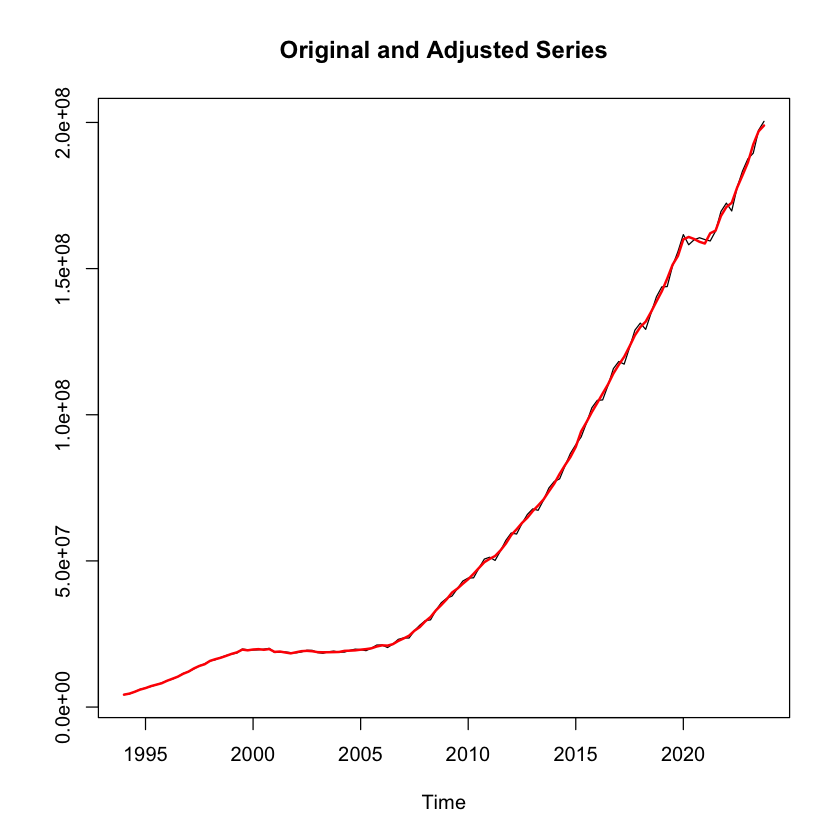

In [17]:
fit <- seas(data3_ts)
summary(fit)
plot(fit)


Call:
seas(x = data4_ts)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
Easter[15]        -0.024102   0.008785  -2.743  0.00608 ** 
AO1994.2          -0.147523   0.035540  -4.151 3.31e-05 ***
LS1998.1          -0.375512   0.056648  -6.629 3.38e-11 ***
LS1999.2          -0.770704   0.057199 -13.474  < 2e-16 ***
AO1999.4           0.356791   0.034648  10.298  < 2e-16 ***
LS2000.2           0.276721   0.062315   4.441 8.97e-06 ***
LS2002.1           0.912083   0.057207  15.944  < 2e-16 ***
AO2003.1          -0.193108   0.032856  -5.877 4.17e-09 ***
AO2006.1          -0.214981   0.032831  -6.548 5.83e-11 ***
LS2015.1           0.302639   0.056558   5.351 8.75e-08 ***
LS2020.2          -0.406787   0.069040  -5.892 3.81e-09 ***
LS2020.3          -0.325132   0.074096  -4.388 1.14e-05 ***
AO2020.4          -0.333516   0.035353  -9.434  < 2e-16 ***
AR-Nonseasonal-01  0.543516   0.110004   4.941 7.78e-07 ***
MA-Nonseasonal-01 -0.213471   0.127157  -1.679  0.09319 .  

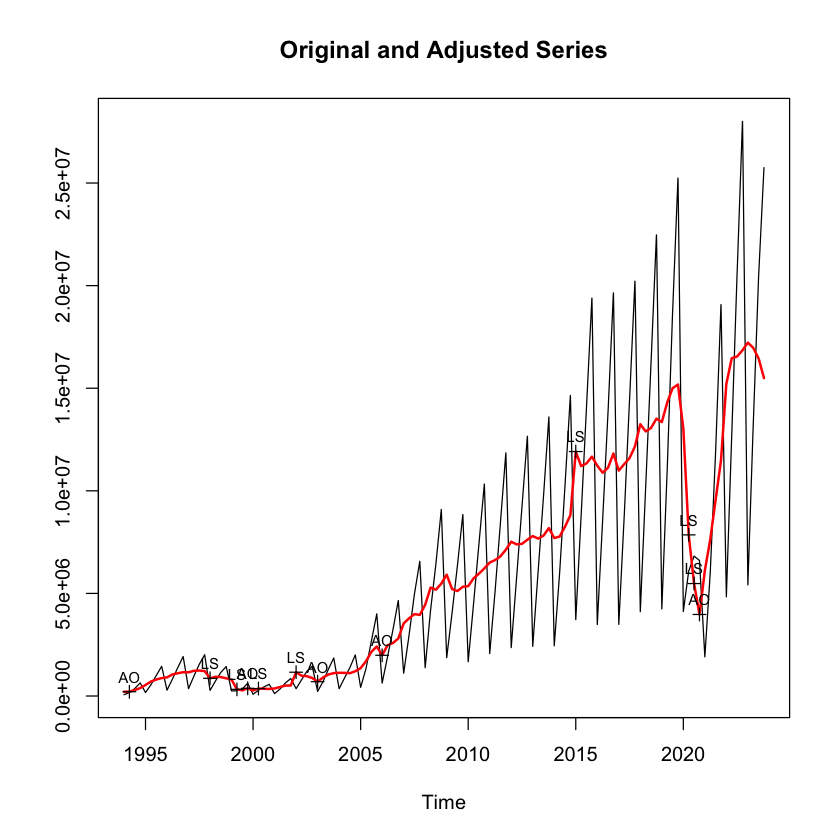

In [18]:
fit2 <- seas(data4_ts)
summary(fit2)
plot(fit2)

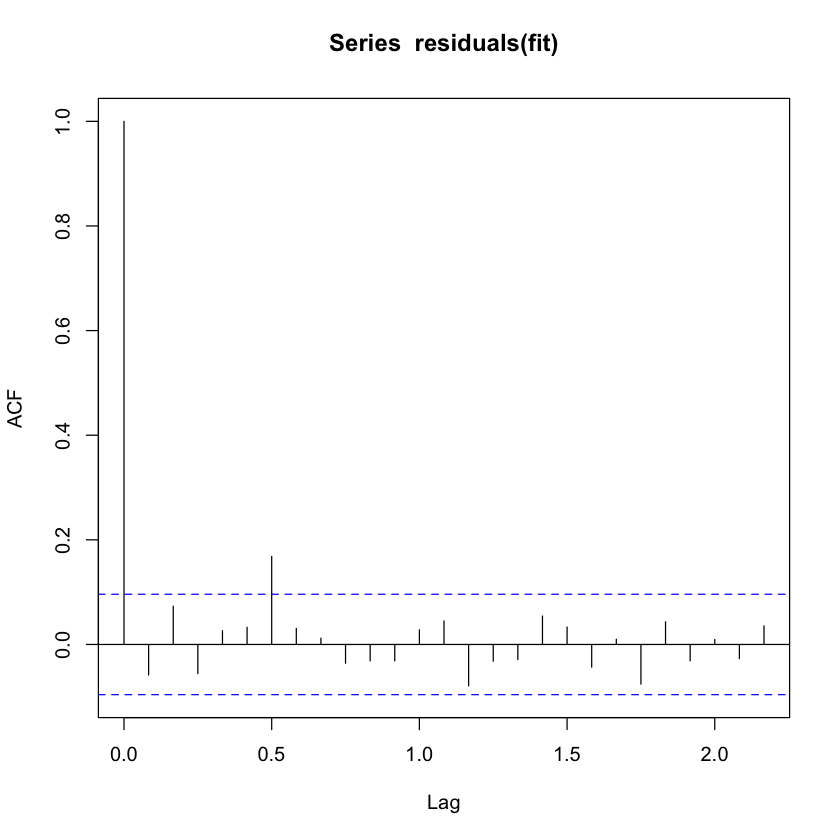

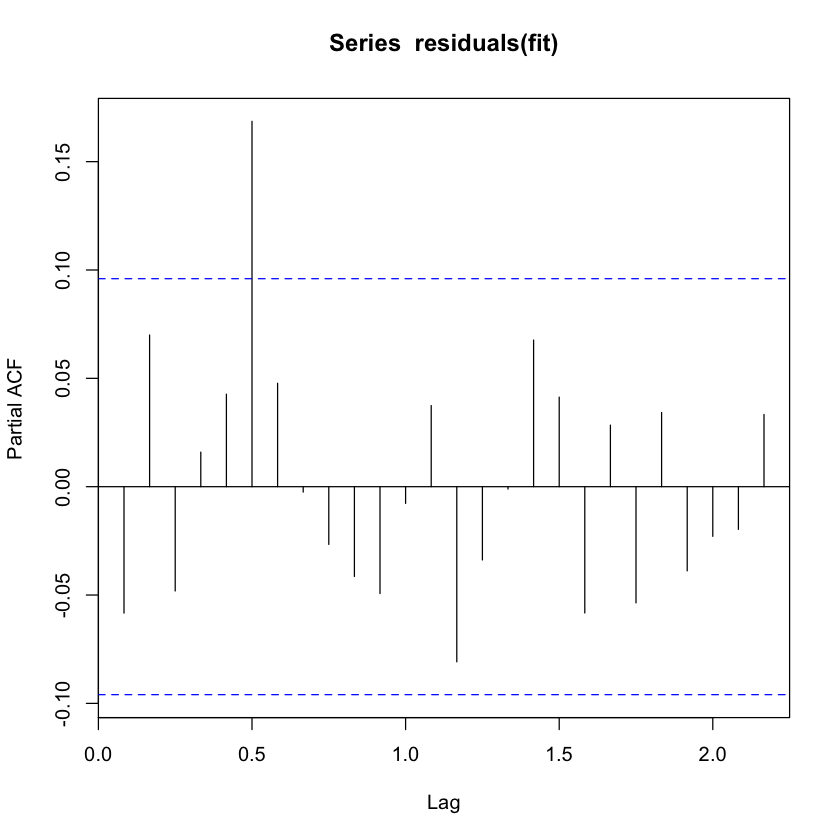

In [73]:
acf(residuals(fit))
pacf(residuals(fit))

In [15]:
# install.packages("dplyr")
install.packages("writexl")


  There is a binary version available but the source version is later:
        binary source needs_compilation
writexl  1.4.2  1.5.1              TRUE



installing the source package 'writexl'




In [1]:
library(dplyr)
library(writexl)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [19]:
adjusted_series <- final(fit)

adjusted_df <- data.frame(
  Date = time(adjusted_series),      # Fechas
  Adjusted = as.numeric(adjusted_series) # Valores ajustados
)

write_xlsx(adjusted_df, "adjusted_series_patrimonio.xlsx")

adjusted_series <- final(fit2)

adjusted_df <- data.frame(
  Date = time(adjusted_series),      # Fechas
  Adjusted = as.numeric(adjusted_series) # Valores ajustados
)

write_xlsx(adjusted_df, "adjusted_series_utilidad.xlsx")

In [25]:
adjusted_series <- final(fit)

adjusted_df <- data.frame(
  Date = time(adjusted_series),      # Fechas
  Adjusted = as.numeric(adjusted_series) # Valores ajustados
)

write_xlsx(adjusted_df, "adjusted_series_morosidad micro.xlsx")

In [ ]:
adjusted_series <- final(fit1)

adjusted_df <- data.frame(
  Date = time(adjusted_series),      # Fechas
  Adjusted = as.numeric(adjusted_series) # Valores ajustados
)

write_xlsx(adjusted_df, "adjusted_series_consumo.xlsx")

In [18]:
adjusted_series <- final(fit2)

library(dplyr)

adjusted_df <- data.frame(
  Date = time(adjusted_series),      # Fechas
  Adjusted = as.numeric(adjusted_series) # Valores ajustados
)

write_xlsx(adjusted_df, "adjusted_series_inversion.xlsx")

In [30]:
install.packages("writexl")


  There is a binary version available but the source version is later:
        binary source needs_compilation
writexl  1.4.2  1.5.1              TRUE



installing the source package 'writexl'


